In [248]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [249]:
film = pd.read_csv('blockbusters.csv')
print(film.shape)

(437, 11)


In [250]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Main_Genre       437 non-null    object 
 1   Genre_2          408 non-null    object 
 2   Genre_3          296 non-null    object 
 3   imdb_rating      437 non-null    float64
 4   length           437 non-null    int64  
 5   rank_in_year     437 non-null    int64  
 6   rating           437 non-null    object 
 7   studio           437 non-null    object 
 8   title            437 non-null    object 
 9   worldwide_gross  437 non-null    object 
 10  year             437 non-null    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 37.7+ KB


In [251]:
film.head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018


In [252]:
film_top=film.groupby('Main_Genre').mean().sort_values('imdb_rating', ascending=False).head(400)
film_top=film_top.reset_index(level=0, drop=False)
film_top.head(15)

,Main_Genre,imdb_rating,length,rank_in_year,year
0,War,7.600000,139.700000,6.100000,1986.200000
1,History,7.580000,129.600000,5.000000,1988.600000
2,Adventure,7.438462,127.153846,3.615385,1998.153846
3,Animation,7.345455,98.227273,5.909091,2010.863636
4,Drama,7.303333,122.900000,5.233333,1990.133333
5,Action,7.296667,130.566667,5.100000,2013.833333
6,Sci-Fi,7.186000,129.580000,5.600000,2000.400000
7,Thriller,7.104762,124.587302,5.825397,1994.396825
8,Sport,7.028571,106.285714,4.142857,1981.000000
9,Fantasy,6.988889,128.907407,4.370370,2001.833333


In [253]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
film_top.style.apply(highlight_max)

,Main_Genre,imdb_rating,length,rank_in_year,year
0,War,7.600000,139.700000,6.100000,1986.200000
1,History,7.580000,129.600000,5.000000,1988.600000
2,Adventure,7.438462,127.153846,3.615385,1998.153846
3,Animation,7.345455,98.227273,5.909091,2010.863636
4,Drama,7.303333,122.900000,5.233333,1990.133333
5,Action,7.296667,130.566667,5.100000,2013.833333
6,Sci-Fi,7.186000,129.580000,5.600000,2000.400000
7,Thriller,7.104762,124.587302,5.825397,1994.396825
8,Sport,7.028571,106.285714,4.142857,1981.000000
9,Fantasy,6.988889,128.907407,4.370370,2001.833333


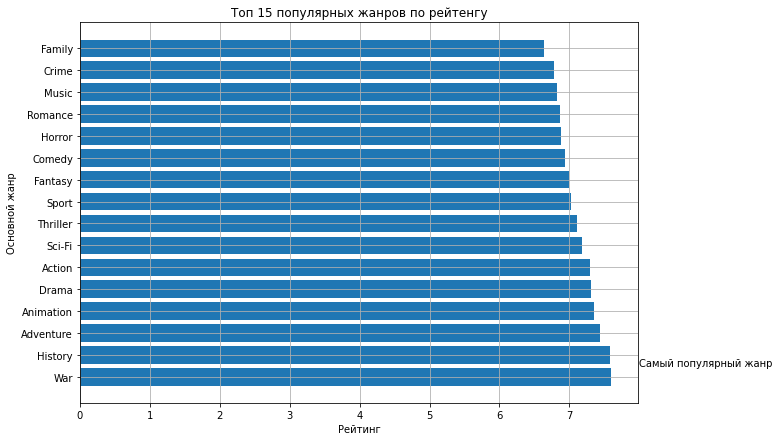

In [254]:
plt.barh(film_top['Main_Genre'], film_top['imdb_rating'])
plt.xlabel('Рейтинг')
plt.ylabel('Основной жанр')
plt.title('Топ 15 популярных жанров по рейтенгу')
plt.text(8, 0.5, 'Самый популярный жанр')
plt.grid(15)

In [255]:
film_y = film[['imdb_rating'] + ['year']]\
    .groupby('year').sum()
film_y.head()

,imdb_rating
year,
1975,46.5
1976,68.0
1977,72.6
1978,70.0
1979,71.6


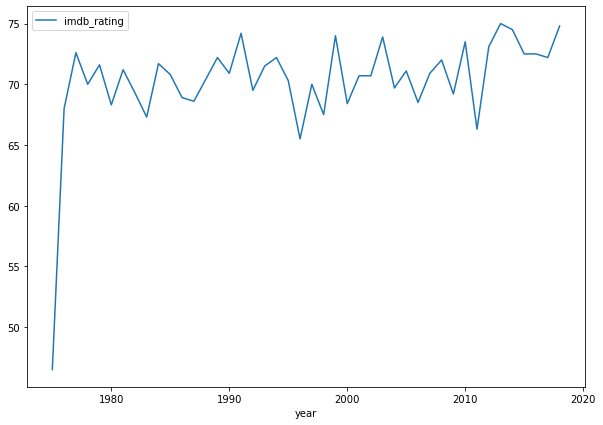

In [256]:
film_y.plot()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

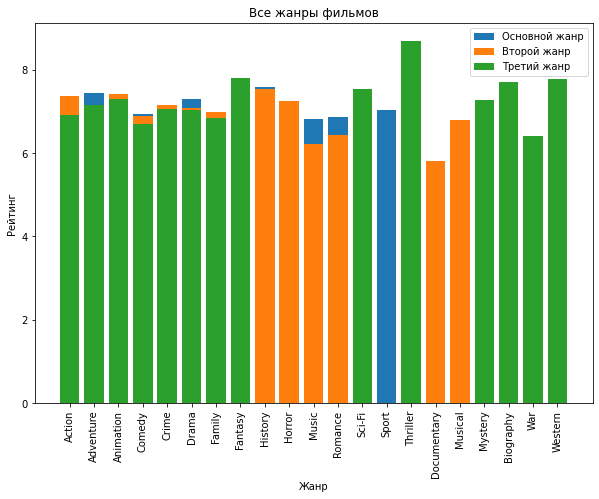

In [257]:
maing = film.groupby('Main_Genre').mean()
maing_names = [i for i, film in film.groupby('Main_Genre')]
genre_2 = film.groupby('Genre_2').mean()
genre2_names = [i for i, film in film.groupby('Genre_2')]
genre_3 = film.groupby('Genre_3').mean()
genre3_names = [i for i, film in film.groupby('Genre_3')]
plt.bar(maing_names[:15], maing['imdb_rating'][:15], label='Основной жанр')
plt.bar(genre2_names[:15], genre_2['imdb_rating'][:15], label='Второй жанр')
plt.bar(genre3_names[:15], genre_3['imdb_rating'][:15], label='Третий жанр')
plt.title('Все жанры фильмов')
plt.xlabel('Жанр')
plt.ylabel('Рейтинг')
plt.legend()
plt.xticks(rotation=90)

In [258]:
top_studio = film.groupby('studio')[['imdb_rating']].sum()\
    .sort_values('imdb_rating', ascending=False).head(10)
top_studio.style.bar()

,imdb_rating
studio,
Warner Bros,627.000000
Walt Disney Pictures,470.300000
Paramount Pictures,404.000000
Universal Pictures,385.100000
20th Century Fox,342.100000
Metro-Goldwyn-Mayer,246.700000
Columbia Pictures,242.700000
Sony Pictures,117.400000
DreamWorks,87.200000


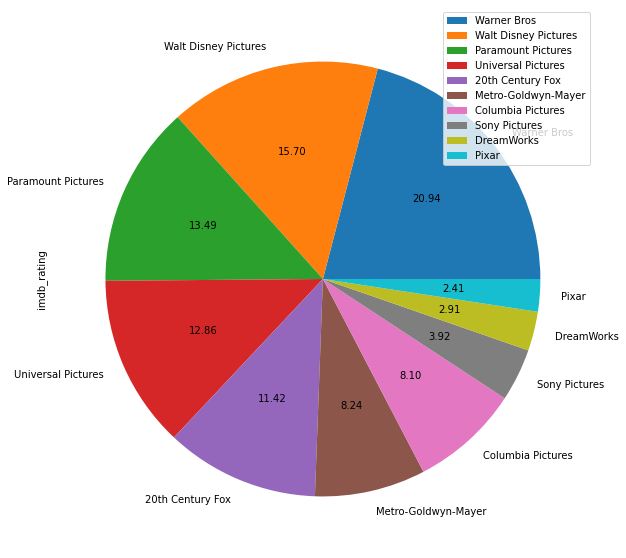

In [259]:
studio_dynamics = film.groupby(['studio']).sum().sort_values(by='imdb_rating', ascending=False).head(10)
studio_dynamics.plot(kind='pie', y='imdb_rating',
                    autopct='%.2f', fontsize=10, figsize=(10, 10))

Text(0, 0.5, 'Фильмы')

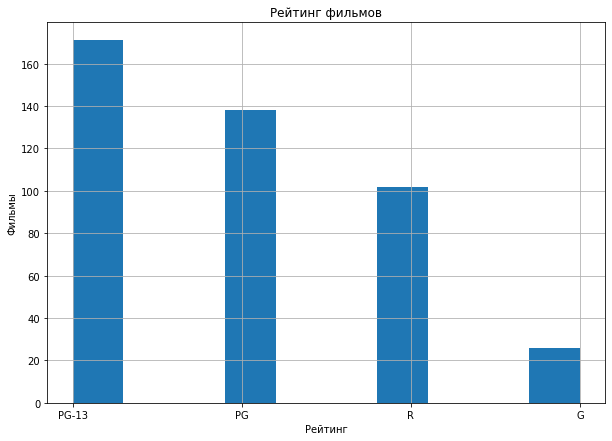

In [260]:
ax = film.rating.hist(bins=10)
ax.set_title('Рейтинг фильмов')
ax.set_xlabel('Рейтинг')
ax.set_ylabel('Фильмы')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

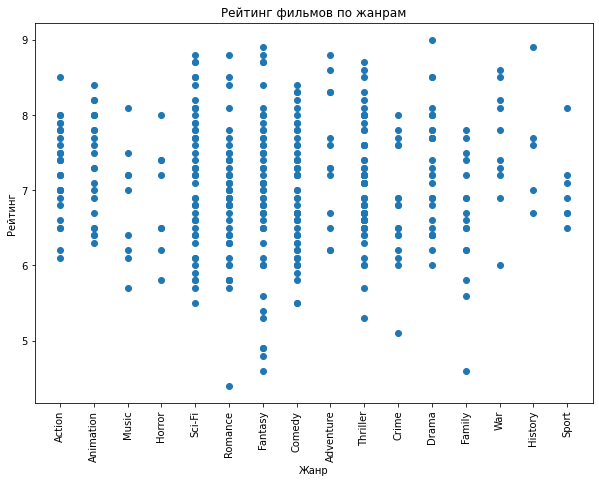

In [261]:
plt.figure
plt.scatter(x=film['Main_Genre'],y=film['imdb_rating'])
plt.title("Рейтинг фильмов по жанрам")
plt.xlabel("Жанр")
plt.ylabel("Рейтинг")
plt.xticks(rotation=90)

In [262]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

In [263]:
film.Main_Genre.unique()

array(['Action', 'Animation', 'Music', 'Horror', 'Sci-Fi', 'Romance',
       'Fantasy', 'Comedy', 'Adventure', 'Thriller', 'Crime', 'Drama',
       'Family', 'War', 'History', 'Sport'], dtype=object)

In [271]:
data = []
for genre in film.Main_Genre.unique():
    data.append(go.Box(y=film[film.Main_Genre==genre].worldwide_gross, name=genre))
iplot(data)